# Canny Edge detection
* developed 1986
* multi-stage algorithm

## Steps
1. apply gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. apply non-maximum suppression to get rid of spurious response to edge detection
4. apply double threshold to dermine potential edges
5. track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges. Filtering Process of getting rid of the lower weighted edges and just keep the higher weighted

For high resolution images where you want general edges, it is usually a good practice to apply a custom blur before applying the canny algorithm.

In the notebook we provide an equation for picking a good starting point for threshold values, but often one will have to adjust for the particular image this.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = "/content/drive/MyDrive/udemy/python_for_computervision_opencv/DATA/"


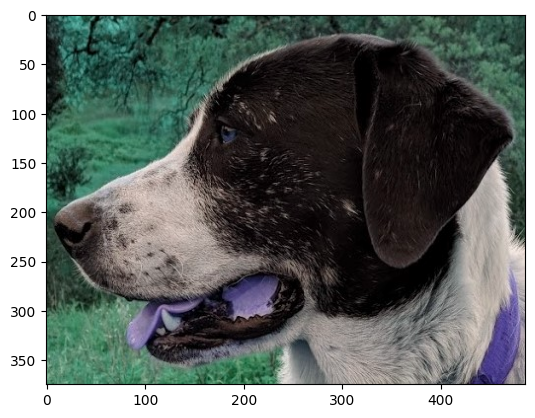

In [3]:
img = cv2.imread(DATA_DIR + "sammy_face.jpg")
plt.imshow(img)

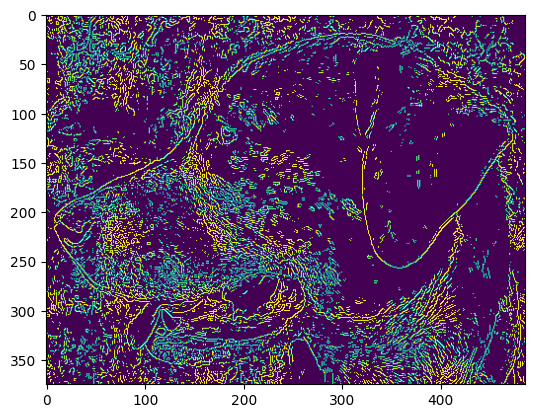

In [4]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127) # setting the threshold to half of the pixel value 255/2
plt.imshow(edges)

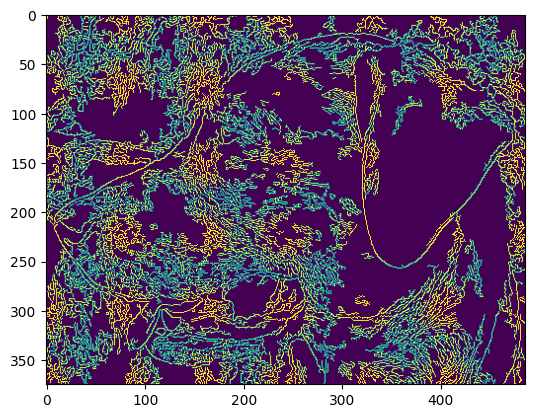

In [5]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255) # setting the threshold to half of the pixel value 255/2
plt.imshow(edges)

In [6]:
# Now find a formula to find out the best thresholds
med_val = np.median(img)
med_val

64.0

In [9]:
 # Set the lower threshold either to 0 or to 70% of the mediam value whichever is greater
lower = int(max(0, 0.7*med_val))
# Set the upper threshold to either 130% of the median or the max 255, whichever is smaller
higher = int(min(255, 1.3*med_val))

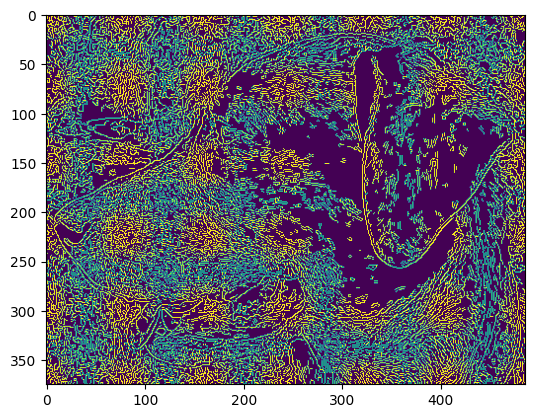

In [10]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=higher) # setting the threshold to half of the pixel value 255/2
plt.imshow(edges)

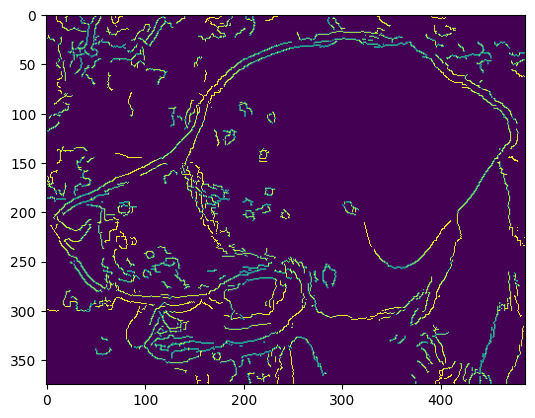

In [13]:
# Now let's blur the image first
blurred_img = cv2.blur(img, ksize=(7,7))
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=higher) # setting the threshold to half of the pixel value 255/2
plt.imshow(edges)